<a href="https://colab.research.google.com/github/MuhammadMoaviaKhan/Data-Analytics-Projects/blob/main/Mental_Health_DataSet_Incomplete_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

from google.colab import files
upload = files.upload()

Saving Mental Health Dataset.csv to Mental Health Dataset.csv


In [2]:
data_set = pd.read_csv(io.BytesIO(upload['Mental Health Dataset.csv']))

In [3]:
data_set.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [5]:
data_set['Timestamp'] = pd.to_datetime(data_set['Timestamp'])
data_set['Timestamp'].head()

0   2014-08-27 11:29:00
1   2014-08-27 11:31:00
2   2014-08-27 11:32:00
3   2014-08-27 11:37:00
4   2014-08-27 11:43:00
Name: Timestamp, dtype: datetime64[ns]

In [6]:
data_set.isnull().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

In [7]:
data_set['self_employed'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [8]:
data_set['self_employed'] = data_set['self_employed'].replace(np.nan, 'maybe')
data_set['self_employed'].unique()

array(['maybe', 'No', 'Yes'], dtype=object)

In [11]:
data_set.isnull().sum()

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

In [12]:
data_set.columns

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')

In [13]:
data_set.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:29:00,Female,United States,Corporate,maybe,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,2014-08-27 11:31:00,Female,United States,Corporate,maybe,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,2014-08-27 11:32:00,Female,United States,Corporate,maybe,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,2014-08-27 11:37:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


# **DATA VISUALIZATION**

***What is the distribution of respondents based on gender?***

In [14]:
gender_distribution = data_set['Gender'].value_counts()
total_respondents = gender_distribution.sum()
gender_percentage = (gender_distribution / total_respondents) * 100

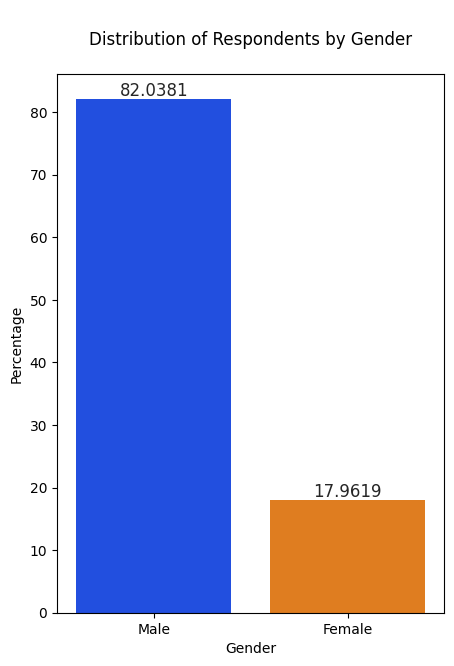

In [15]:
plt.figure(figsize = (5, 7))
ax = sns.barplot(x = gender_percentage.index, y = gender_percentage.values, hue = gender_percentage.index, palette = 'bright', legend = False)
sns.set(style = 'darkgrid')
plt.title('\nDistribution of Respondents by Gender\n')
plt.xlabel('Gender')
plt.ylabel('Percentage')

for bars in ax.containers:
  ax.bar_label(bars)

***Which countries are most represented in the dataset?***

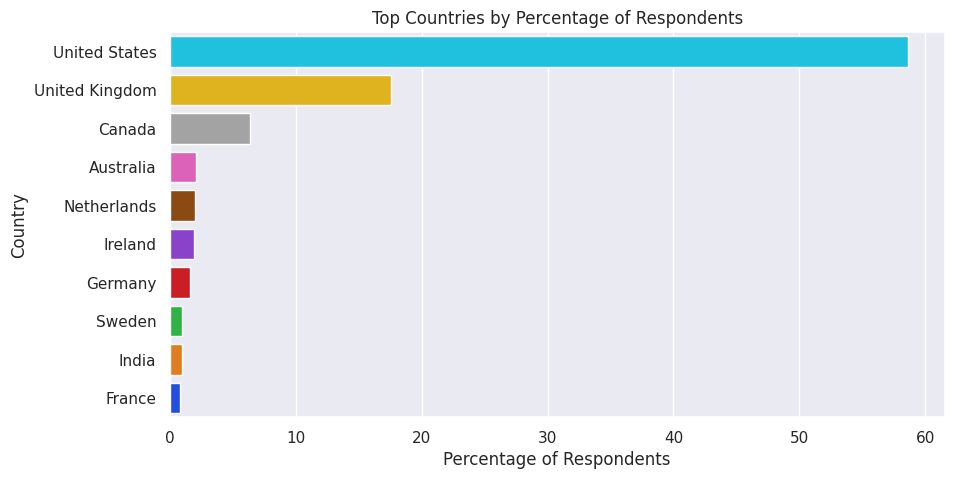

----------------------------------------------------------------------------------------------------------------------------------------------------------------


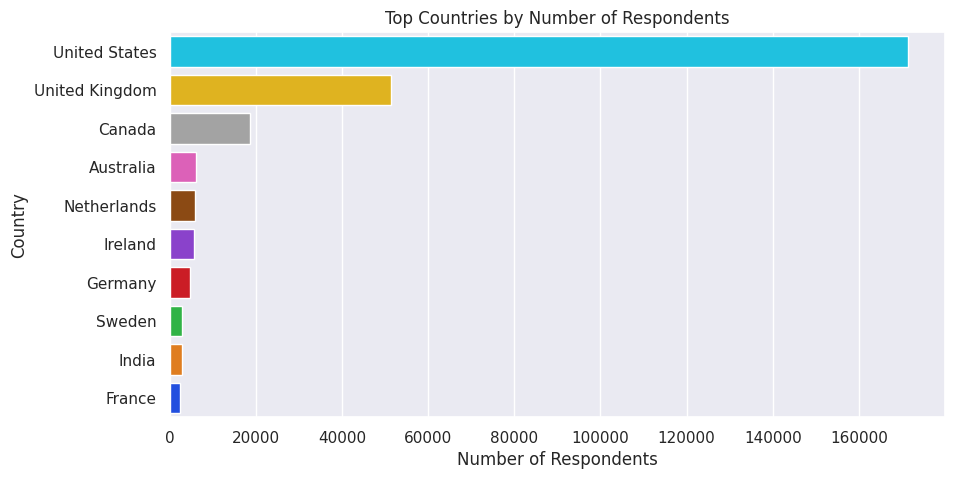

In [16]:
country_distribution = data_set['Country'].value_counts()
total_respondents = country_distribution.sum()
country_percentage = (country_distribution / total_respondents) * 100
country_percentage = country_percentage.head(10)

plt.figure(figsize = (10, 5))
sns.barplot(x = country_percentage.values, y = country_percentage.index, hue = country_percentage.values, legend = False, palette = 'bright')
sns.set(style = 'darkgrid')
plt.title('Top Countries by Percentage of Respondents')
plt.xlabel('Percentage of Respondents')
plt.ylabel('Country')
plt.show()
print('-'*160)

country_count = data_set['Country'].value_counts().head(10)

plt.figure(figsize = (10, 5))
sns.barplot(x = country_count.values, y = country_count.index, hue = country_count.values, legend = False, palette = 'bright')
sns.set(style = 'darkgrid')
plt.title('Top Countries by Number of Respondents')
plt.xlabel('Number of Respondents')
plt.ylabel('Country')
plt.show()

***What are the most common occupations among respondents?***

In [17]:
data_set.columns

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')

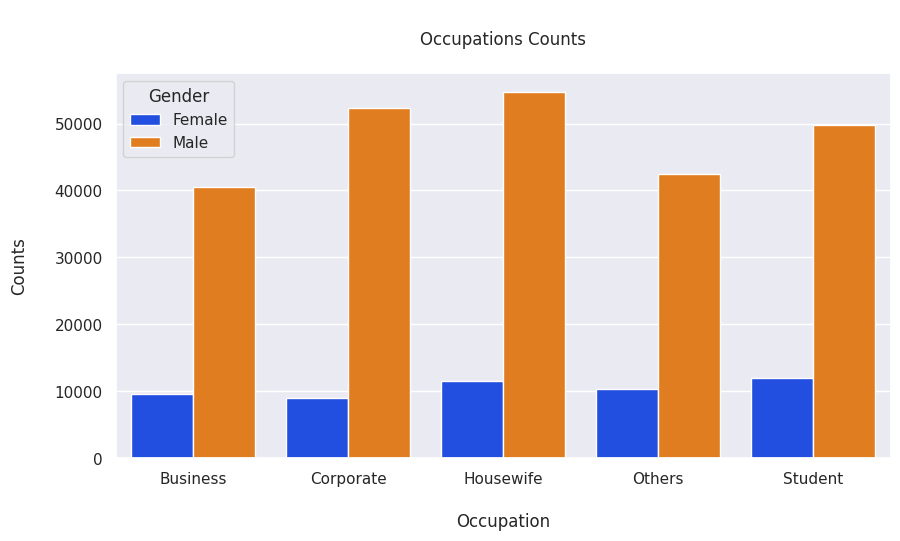

In [18]:
occupation_distribution = data_set.groupby(['Occupation', 'Gender']).agg({'Gender': 'count'})
occupation_distribution.rename({'Gender': 'Counts'}, axis = 1, inplace = True)
occupation_distribution.reset_index('Gender', inplace = True)

plt.figure(figsize = (10, 5))
ax = sns.barplot(x = occupation_distribution.index, y = occupation_distribution['Counts'], hue = occupation_distribution['Gender'], legend = True, palette = 'bright')
sns.set(style = 'darkgrid')
plt.title('\nOccupations Counts\n')
plt.xlabel('\nOccupation')
plt.ylabel('Counts\n')
plt.show()

***How many respondents have a family history of mental health issues?***

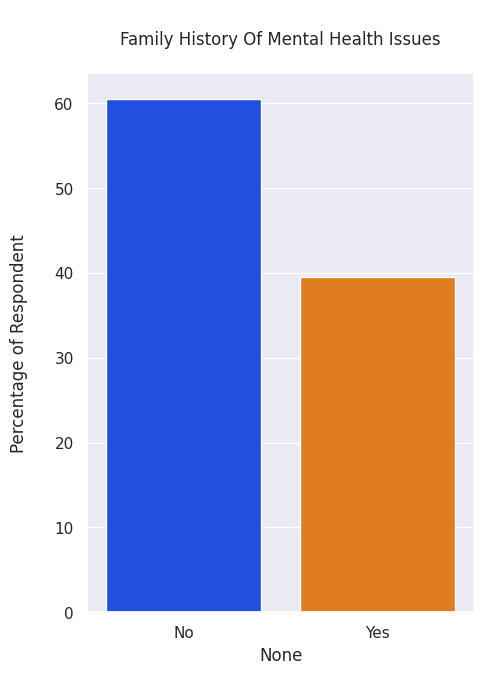

In [39]:
family_history = data_set['family_history'].value_counts()
family_history_distribution = (family_history / family_history.sum()) * 100

plt.figure(figsize = (5, 7))
sns.barplot(x = family_history_distribution.index, y = family_history_distribution.values, hue = family_history_distribution.index, palette = 'bright', legend = False)
sns.set(style = 'darkgrid')
plt.title('\nFamily History Of Mental Health Issues\n')
plt.ylabel('Percentage of Respondent\n')
plt.show()


***What percentage of respondents have sought treatment for mental health issues?***

In [37]:
data_set.columns

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')

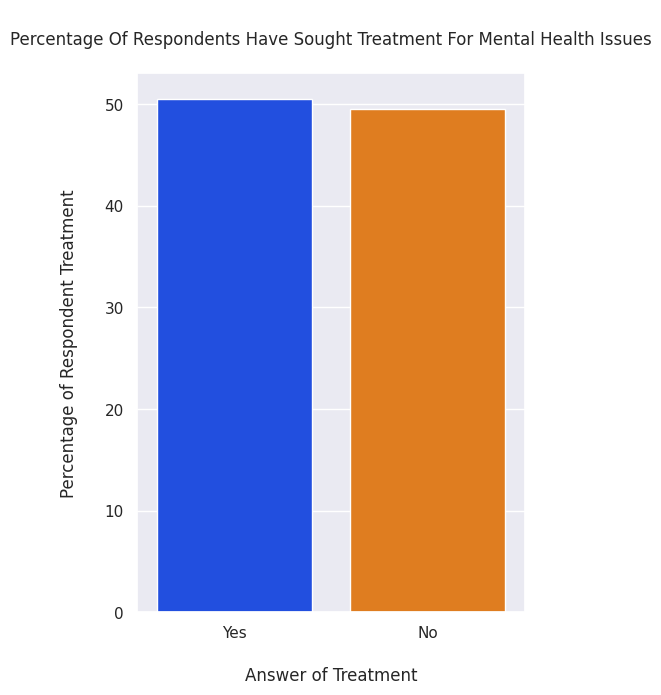

In [40]:
treatment = data_set['treatment'].value_counts()
treatment_percentage = (treatment / treatment.sum()) * 100

plt.figure(figsize = (5, 7))
sns.barplot(x = treatment_percentage.index, y = treatment_percentage.values, hue = treatment_percentage.index, palette = 'bright', legend = False)
sns.set(style = 'darkgrid')
plt.title('\nPercentage Of Respondents Have Sought Treatment For Mental Health Issues\n')
plt.xlabel('\nAnswer of Treatment')
plt.ylabel('Percentage of Respondent Treatment\n')
plt.show()


In [41]:
data_set.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:29:00,Female,United States,Corporate,maybe,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,2014-08-27 11:31:00,Female,United States,Corporate,maybe,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,2014-08-27 11:32:00,Female,United States,Corporate,maybe,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,2014-08-27 11:37:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


***Are there any observable mood swings among respondents?***

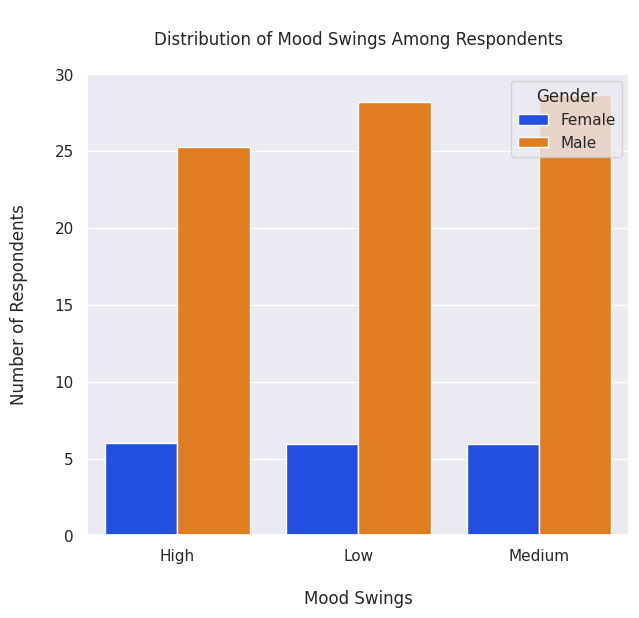

In [67]:
mood_swing = data_set.groupby(['Mood_Swings', 'Gender']).agg({'Gender': 'count'})
mood_swing.rename({'Gender': 'Gender_Counts'}, axis = 1, inplace = True)
mood_swing.reset_index('Gender', inplace = True)
mood_swing['Percentage']  = (mood_swing['Gender_Counts'] / mood_swing['Gender_Counts'].sum()) *100
mood_swing

plt.figure(figsize = (7, 6))
sns.barplot(x = mood_swing.index, y = mood_swing['Percentage'], hue = mood_swing['Gender'], legend = True, palette = 'bright')
plt.title('\nDistribution of Mood Swings Among Respondents\n')
plt.xlabel('\nMood Swings')
plt.ylabel('Number of Respondents\n')
plt.show()